### Imports

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Estilos de Seaborn
sns.set()
sns.set_palette(palette='colorblind')

### Carga de datos

In [108]:
columnas_cargar = [ "created","application_id", "ref_type", "attributed", "implicit",
                   "device_brand", "event_uuid", "kind", "wifi", 'ref_hash']

installs = pd.read_csv("../../../data/installs.csv", usecols=columnas_cargar, parse_dates=["created"])

In [109]:
installs.dtypes

created           datetime64[ns]
application_id             int64
ref_type                   int64
ref_hash                   int64
attributed                  bool
implicit                    bool
device_brand             float64
event_uuid                object
kind                      object
wifi                      object
dtype: object

# Preguntas:
      
<li> Cuales marcas tuvieron más install? Y ponderado?
        <li> Eventos que llevaron a más installs? x uui
                   <li>Wifi vs no wifi installs?
                       <li> wifi -> click -> wifi
                           <li> kind de installs
                               <li> aplicaciones con más installs
                                   <li> aplicacion con subastas y mas installs
                                    
                   

## Cuántos installs hubieron? 

In [110]:
installs.ref_hash.count()

3412

## Cuántos fueron atribuidos a Jampp?

In [111]:
installs[installs["attributed"]].ref_hash.count()

0

# Análisis de Installs en el tiempo

### Cómo evolucionaron los installs en el mes?

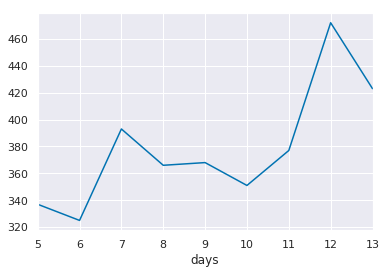

In [112]:
# add a column hours and days
installs["hours"] = installs['created'].dt.hour
installs["days"] = installs['created'].dt.day

installs_por_dia = installs.groupby(installs['days']).ref_hash.agg("count").rename(columns ={"ref_hash":"Cantidad de Installs"})
    
grafico = installs_por_dia.plot(kind="line")


In [113]:
(installs[installs['created'].dt.day == 12])['created'].dt.day_name().iloc[0]

'Tuesday'

### Cómo evolucionaron los installs según la hora del día?

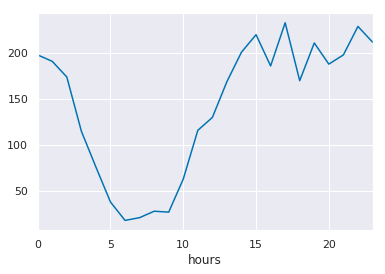

In [114]:
installs_por_hora = installs.groupby(installs['hours']).ref_hash.agg("count").rename(columns ={"ref_hash":"Cantidad de Installs"})
    
grafico = installs_por_hora.plot(kind="line")


Text(111.5, 0.5, 'Cantidad de Installs')

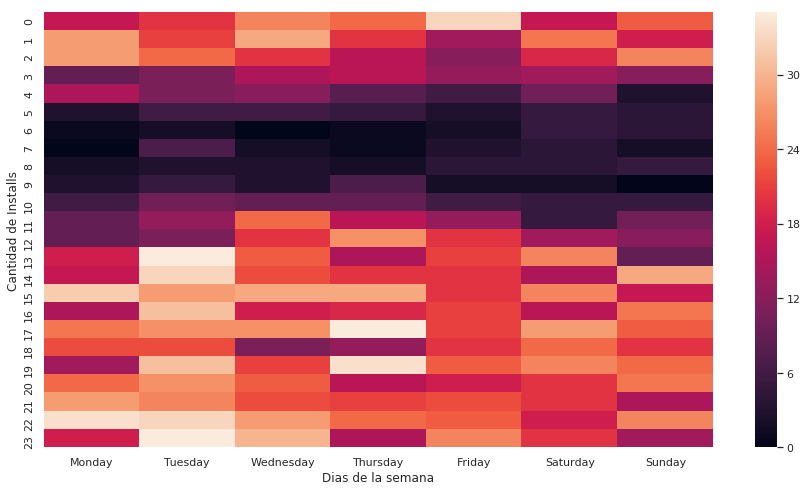

In [146]:
installs["day_of_week"] = installs["created"].dt.day_name()
install_count = installs[(installs["created"] >= "03-07-2019")]\
                .groupby( [pd.Grouper(key="created",freq="h"),"day_of_week" ])["ref_hash"].count().reset_index()
intalls_por_dia_hora = install_count.pivot("created","day_of_week","ref_hash").reset_index()
intalls_por_dia_hora["created"] = intalls_por_dia_hora["created"].dt.hour  
intalls_por_dia_hora = intalls_por_dia_hora.groupby("created").agg("sum")
column_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
intalls_por_dia_hora = intalls_por_dia_hora.reindex(column_order, axis=1)

fig,ax = plt.subplots(figsize = (15,8))
sns.heatmap(intalls_por_dia_hora)
ax.set_xlabel("Dias de la semana")
ax.set_ylabel("Cantidad de Installs")


# Análisis de Installs en el por marcas

### Cuáles marcas tuvieron más installs?

In [205]:
installs_por_marca = installs.groupby(installs['device_brand']).agg({"ref_hash" : "count"}) 
otros = installs_por_marca[installs_por_marca['ref_hash'] < 100]
installs_por_marca = installs_por_marca[installs_por_marca['ref_hash'] >= 100].reset_index()


In [206]:
adjuntar = pd.DataFrame([['Other', otros.ref_hash.sum()]])
adjuntar.columns = ['device_brand','ref_hash']

installs_por_marca =installs_por_marca.append(adjuntar)


Text(0.5, 0, 'Marca')

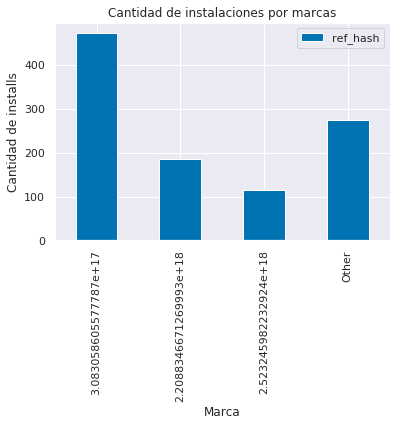

In [207]:
installs_por_marca.plot(x='device_brand', y='ref_hash',kind="bar")
plt.title("Cantidad de instalaciones por marcas")
plt.ylabel("Cantidad de installs")
plt.xlabel("Marca")
